### Kaggle Competition - Walmart Recruiting - Store Sales Forecasting

In [1135]:
import warnings
warnings.filterwarnings('ignore')

#### Import necessary libraries

In [1136]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


---

### 1. Dataset overview

#### 1.1 **'stores.csv'**

45 rows, 3 columns;  
45 Walmart stores located in different regions

Features:

- [Store] - the store numebr
- [Type] - the type of store
- [Size] - the size of the store

In [1137]:
stores_df = pd.read_csv('data/stores.csv')

stores_df.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [1138]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [1139]:
stores_df.shape

(45, 3)

#### 1.2 **'features.csv'**

8190 rows, 12 columns;  
This file contains additional data related to the store, department, and regional activity for the given dates.

Features:

- [Store] - the store number
- [Date] - the week
- [Temperature] - average temperature in the region
- [Fuel_Price] - cost of fuel in the region
- [MarkDown1-5] - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- [CPI] - the consumer price index
- [Unemployment] - the unemployment rate
- [IsHoliday] - whether the week is a special holiday week

In [1140]:
features_df = pd.read_csv('data/features.csv')

features_df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [1141]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [1142]:
features_df.tail(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [1143]:
features_df.shape

(8190, 12)

#### 1.3 **'train.csv'**

421570 rows, 5 columns;  
This is the historical training data, which covers to 2010-02-05 to 2012-11-01

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [Weekly_Sales] -  sales for the given department in the given store
- [IsHoliday] - whether the week is a special holiday week

In [1144]:
train_df = pd.read_csv('data/train.csv')

train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [1145]:
train_df.shape

(421570, 5)

#### 1.4 **'test.csv'**

115064 rows, 4 columns;  
This file is identical to train.csv, except we have withheld the weekly sales. 

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [IsHoliday] - whether the week is a special holiday week

In [1146]:
test_df = pd.read_csv('data/test.csv')

test_df.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [1147]:
test_df.shape

(115064, 4)

---

### 2. Explore Datasets

#### 2.1 **'Explore stores_df'**

In [1148]:
stores_df.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [1149]:
# no missing value
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [1150]:
stores_df['Type'].value_counts(dropna = False)

Type
A    22
B    17
C     6
Name: count, dtype: int64

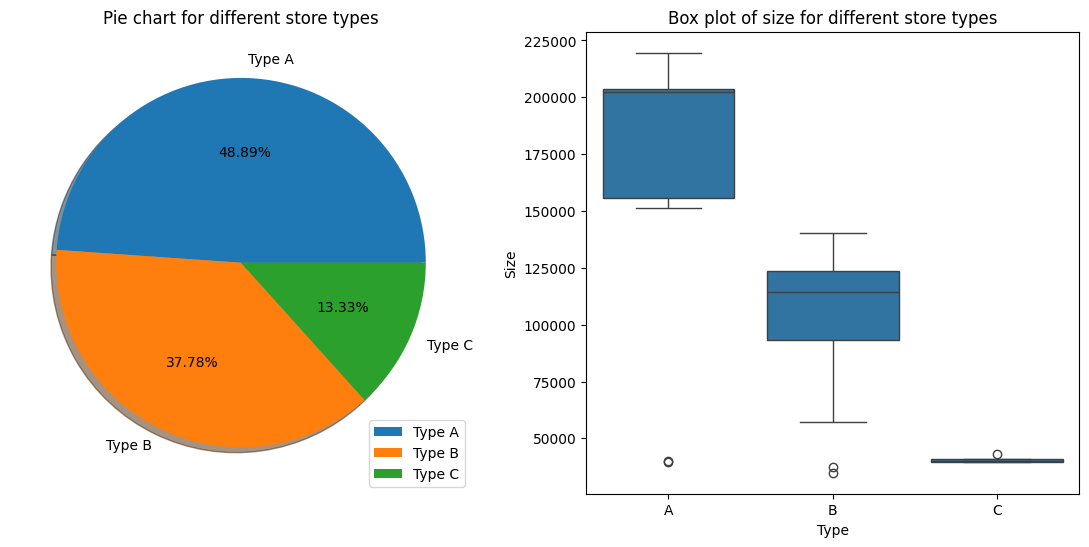

In [1151]:
# visualization

type_groups = stores_df.groupby('Type').size()
sizes = [type_groups['A'], type_groups['B'], type_groups['C']]
labels = ['Type A', 'Type B', 'Type C']

# create canvas
fig = plt.figure(figsize = (14, 6))

# ============================================
# pie chart for stores with different 'type'

ax_type = fig.add_subplot(121)

ax_type.pie(x = sizes, labels = labels, shadow = True, autopct = '%.2f%%')

ax_type.set_title('Pie chart for different store types')

ax_type.legend(labels, loc = 'lower right')

# ============================================
# box chart for the size of store

ax_size = fig.add_subplot(122)

sns.boxplot(data = stores_df, x = 'Type', y = 'Size', ax = ax_size)

ax_size.set_title('Box plot of size for different store types')


plt.show()

#####################  
  Observation on stores  
#####################

1. About half of the stores are Type A
2. Type A basically has the biggest size, and Type C has the smallest one
3. There are only a few exceptions (outliers) in observation 2

#### 2.2 **Merge Datasets**

##### 2.2.1 **Merge Train Datasets**

In [1152]:
# left join 'train' using Store in 'stores'
raw_train = pd.merge(train_df, stores_df, 
                    how = 'left', 
                    left_on = 'Store', right_on = 'Store')

raw_train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315


In [1153]:
# left join 'raw_train' using Store & Date in 'features'
raw_train = pd.merge(raw_train, features_df, 
                    how = 'left', 
                    left_on = ['Store', 'Date'], right_on = ['Store', 'Date'])

raw_train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [1154]:
# delete redundant 'IsHoliday_y'
train_df = raw_train.drop(['IsHoliday_y'], axis = 1)

# rename 'IsHoliday_x' to 'IsHoliday'
train_df.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

train_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [1155]:
train_df.shape

(421570, 16)

##### 2.2.2 **Merge Test Datasets**

In [1156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [1157]:
# left join 'test' using Store in 'stores'
raw_test = pd.merge(test_df, stores_df, 
                    how = 'left', 
                    left_on = 'Store', right_on = 'Store')

# left join 'raw_train' using Store & Date in 'features'
raw_test = pd.merge(raw_test, features_df, 
                    how = 'left', 
                    left_on = ['Store', 'Date'], right_on = ['Store', 'Date'])

# delete redundant 'IsHoliday_y'
test_df = raw_test.drop(['IsHoliday_y'], axis = 1)

# rename 'IsHoliday_x' to 'IsHoliday'
test_df.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

test_df.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573


In [1158]:
test_df.shape

(115064, 15)

#### 2.3 **Generate new features 'month' & 'week' form 'Date'**

In [1159]:
# # convert feature 'Date'from string to datetime in training set
# train_df['Date'] = pd.to_datetime(train_df['Date'])

# def extract_month_n_week(row):
#     month = row['Date'].month
#     week = row['Date'].week

#     row['month'] = month
#     row['week'] = week

#     return row

# train_df = train_df.apply(extract_month_n_week, axis = 1)

# train_df.head(2)

In [1160]:
# # convert feature 'Date'from string to datetime in test set
# test_df['Date'] = pd.to_datetime(test_df['Date'])

# test_df = test_df.apply(extract_month_n_week, axis = 1)

# test_df.head(2)

In [1161]:
# # save the processed dataset into local
# train_df.to_csv('processed_data/full_train.csv')
# test_df.to_csv('processed_Data/full_test.csv')

#### 2.4 **Explore 'train_df'**

In [1162]:
train_df = pd.read_csv('processed_data/full_train.csv').drop(['Unnamed: 0'], axis = 1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  month         421570 non-null  int64  
 17  week          421570 non-null  int64  
dtypes: b

In [1163]:
# check the number of missing value
train_df.isna().sum().sort_values(ascending = False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Dept                 0
month                0
Unemployment         0
CPI                  0
Store                0
Fuel_Price           0
Temperature          0
Size                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Date                 0
week                 0
dtype: int64

##### 2.4.1 feature 'Store'

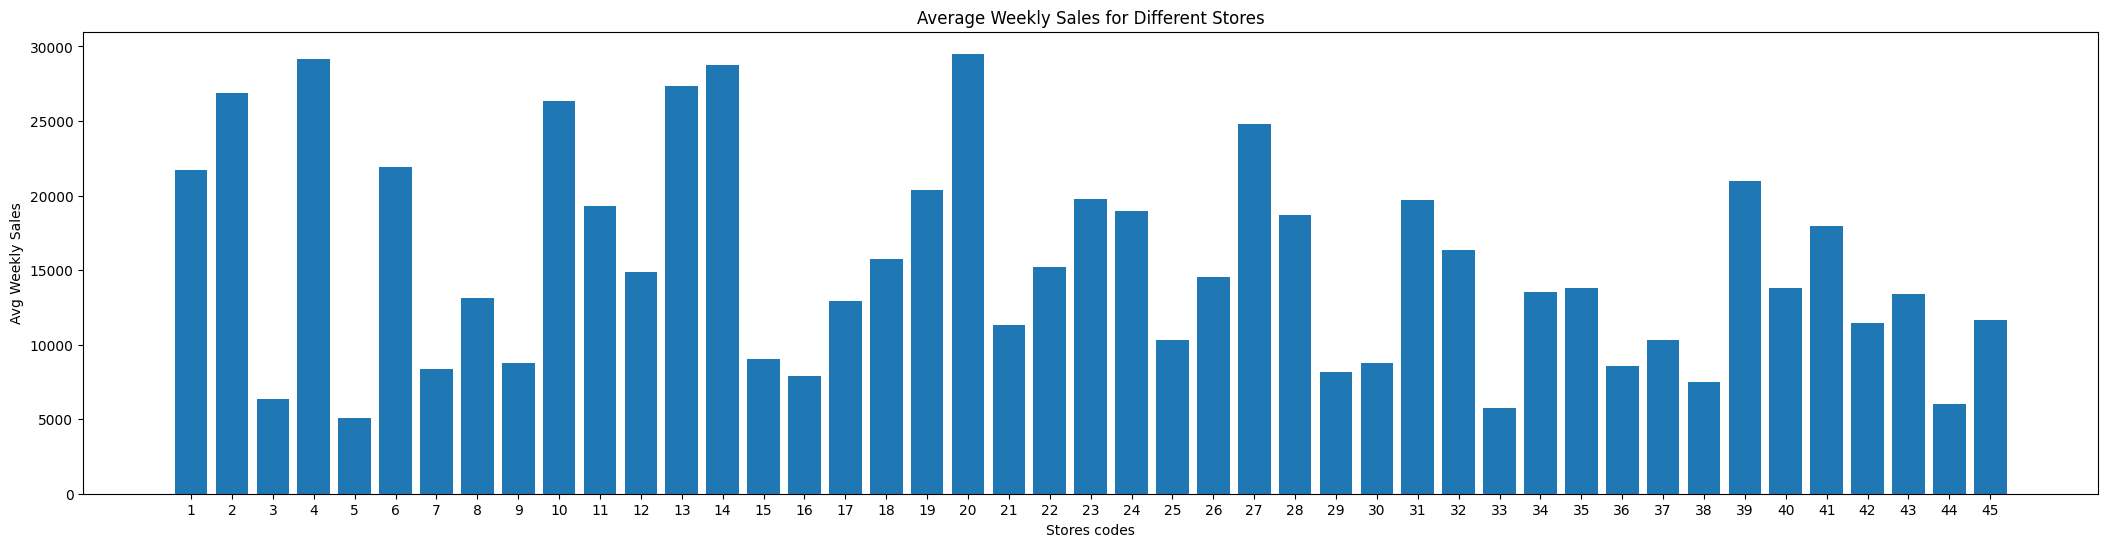

In [1164]:
fig = plt.figure(figsize = (26, 6))

# visualization of the relationship between 'Store' & Avg 'Weekly_Sales'
stores = np.arange(1, 46, 1)
avg_sales = train_df.groupby('Store')['Weekly_Sales'].mean()

ax1 = fig.add_subplot(111)

ax1.bar(x = stores, height = avg_sales)

ax1.set_title('Average Weekly Sales for Different Stores')
ax1.set_xlabel('Stores codes')
ax1.set_ylabel('Avg Weekly Sales')
ax1.set_xticks(stores)

plt.show()

In [1165]:
top5 = avg_sales.sort_values(ascending = False).head()

info_top5 = train_df[train_df['Store'].isin(top5.index)]

info_top5[['Store', 'Type']].drop_duplicates()


,Store,Type
10244,2,A
29518,4,A
117606,13,A
128080,14,A
187335,20,A


###############  
Observations  
###############

The average weekly sales among stores vary significantly, which could be due to many features. However, it is observed that the stores with the top five weekly sales are all of Type A.

##### 2.4.2 feature 'Dept'(Department)

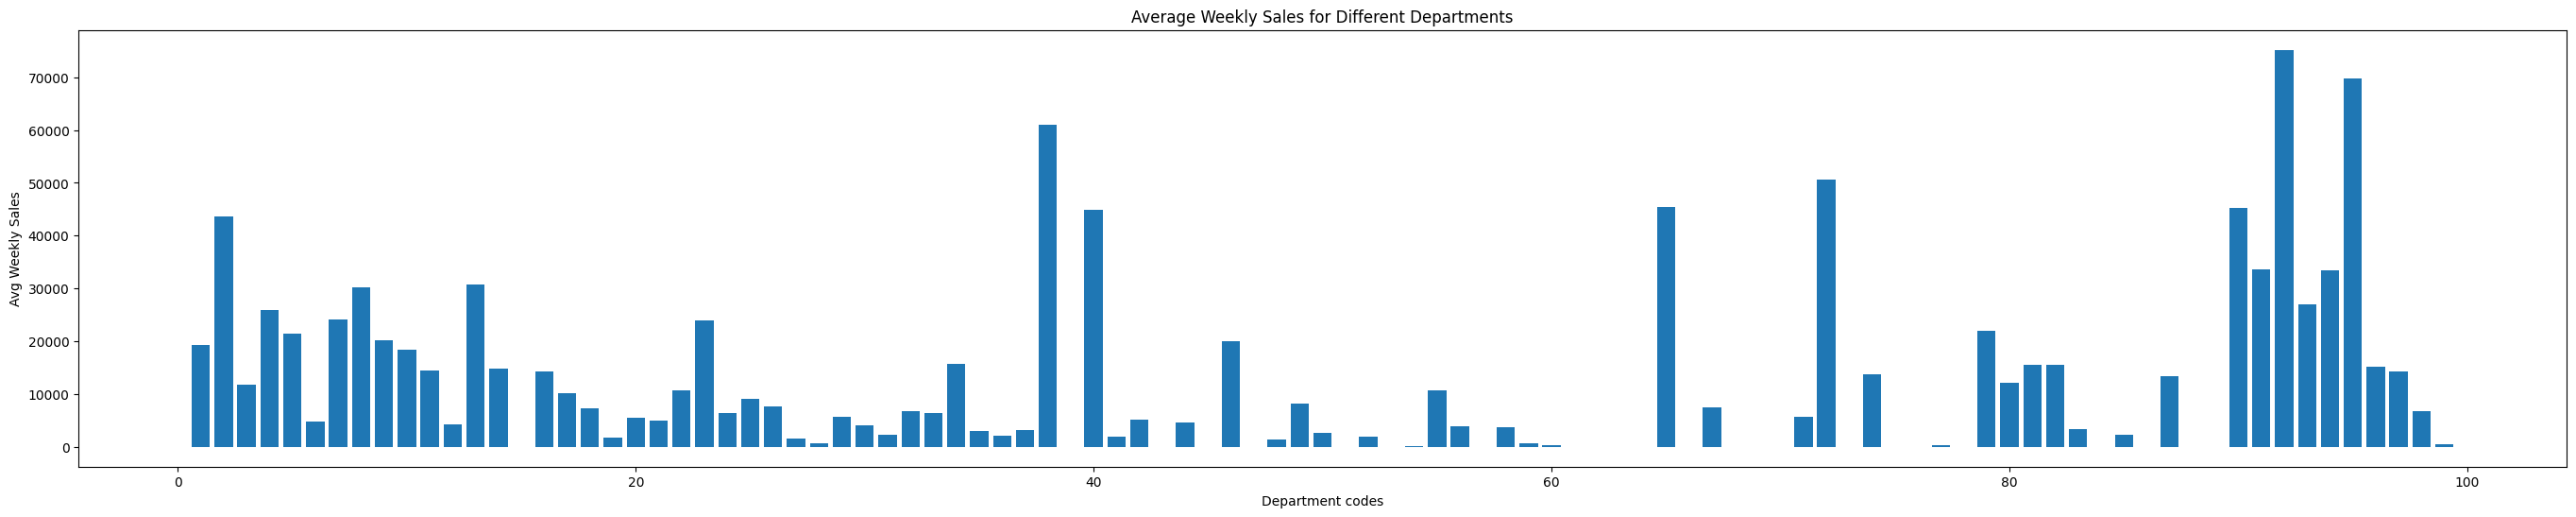

In [1166]:
fig = plt.figure(figsize = (34, 6))

# visualization of the relationship between 'Dept' & Avg 'Weekly_Sales'
avg_sales = train_df.groupby('Dept')['Weekly_Sales'].mean()
depts = avg_sales.index

ax1 = fig.add_subplot(111)

ax1.bar(x = depts, height = avg_sales)

ax1.set_title('Average Weekly Sales for Different Departments')
ax1.set_xlabel('Department codes')
ax1.set_ylabel('Avg Weekly Sales')

plt.show()

In [1167]:
top8 = avg_sales.sort_values(ascending = False).head(8)

top8

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
Name: Weekly_Sales, dtype: float64

###############  
Observations  
###############

Department 92 has the highest average weekly sale, top 8 are departments 92, 95, 38, 72, 65, 90, 40, 2

##### 2.4.3 feature 'IsHoliday'

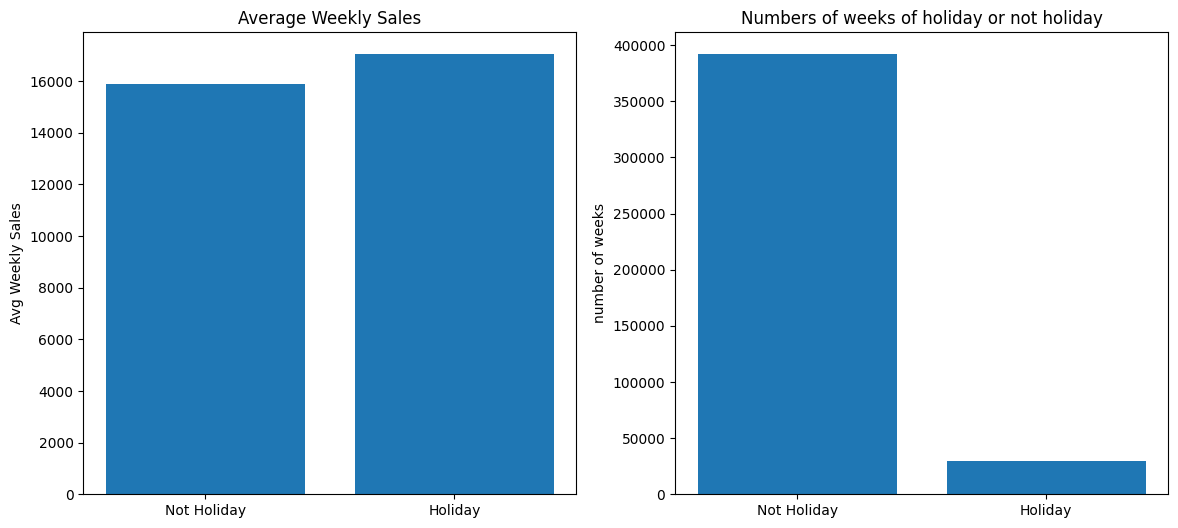

In [1168]:
fig = plt.figure(figsize = (14, 6))

# visualization of the relationship between 'IsHoliday' & Avg 'Weekly_Sales'

# ===============================
# 'Holiday or not' vs 'avg sales'
avg_sales = train_df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday = ['Not Holiday', 'Holiday']

ax1 = fig.add_subplot(121)

ax1.bar(x = holiday, height = avg_sales)

ax1.set_title('Average Weekly Sales')
ax1.set_ylabel('Avg Weekly Sales')

# ===============================
# 'Holiday or not' vs 'count'

h_count = train_df.groupby('IsHoliday')['Weekly_Sales'].count()

ax2 = fig.add_subplot(122)

ax2.bar(x = holiday, height = h_count)

ax2.set_title('Numbers of weeks of holiday or not holiday')
ax2.set_ylabel('number of weeks')


plt.show()

###############  
Observations  
###############

In general, the weekly sales during holidays is slightly higher than that of non-holidays. However, the number of weeks of non-holiday periods far exceeds that of holidays. Therefore, whether the current time falls within a holiday has a significant impact on the weekly sales revenue.

##### 2.4.4 feature 'Type '

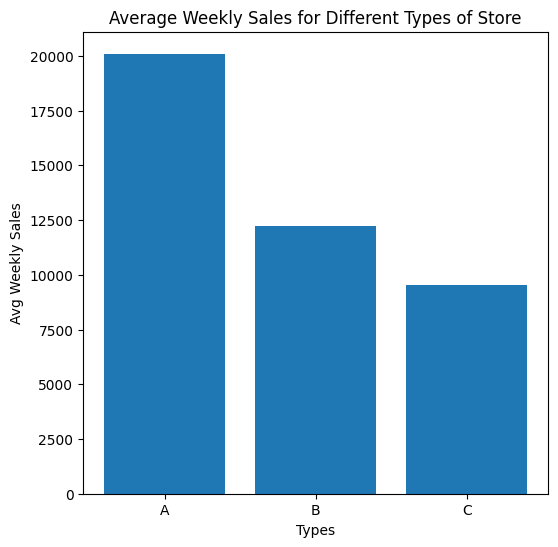

In [1169]:
fig = plt.figure(figsize = (6, 6))

# visualization of the relationship between 'IsHoliday' & Avg 'Weekly_Sales'

# ===============================
# 'Holiday or not' vs 'avg sales'
avg_sales = train_df.groupby('Type')['Weekly_Sales'].mean()
types = avg_sales.index

ax1 = fig.add_subplot(111)

ax1.bar(x = types, height = avg_sales)

ax1.set_title('Average Weekly Sales for Different Types of Store')
ax1.set_xlabel('Types')
ax1.set_ylabel('Avg Weekly Sales')


plt.show()

###############  
Observations  
###############

Type 'A' has the highest Avg weekly sales, which is consistent with what we found before when we explore feature 'Store'.

##### 2.4.5 feature 'Size'

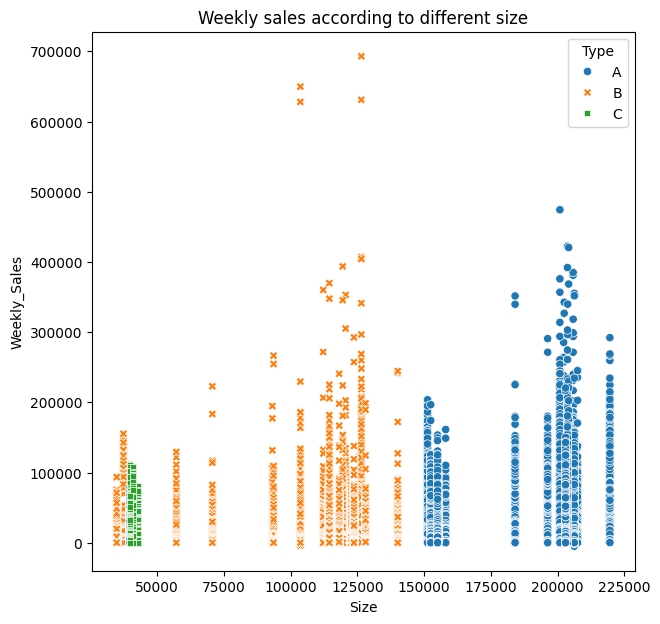

In [1170]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

sns.scatterplot(data = train_df, x = 'Size', y = 'Weekly_Sales',
                hue = 'Type', palette = 'tab10', style = 'Type',
                ax = ax)

ax.set_title('Weekly sales according to different size')
plt.show()

###############  
Observations  
###############

While weekly sales does increase to some extent with size, there are still many unexpected deviations from this pattern. Therefore, size is not the key factor determining weekly sales revenue.

##### 2.4.6 feature 'Temperature'

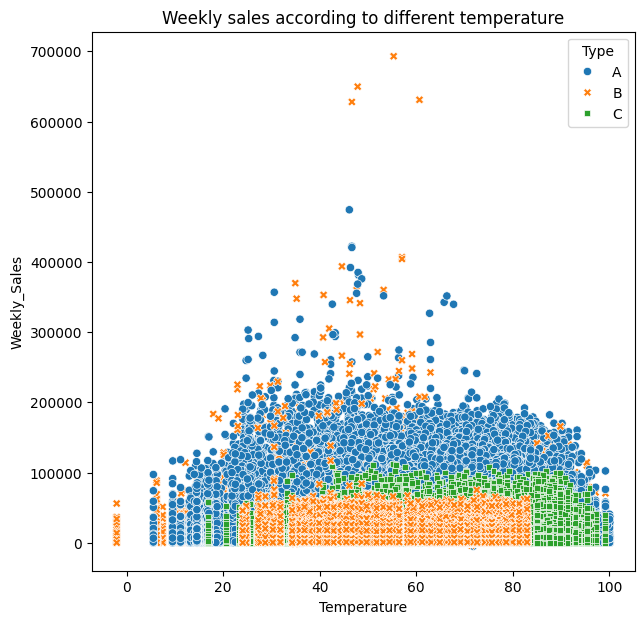

In [1171]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

sns.scatterplot(data = train_df, x = 'Temperature', y = 'Weekly_Sales',
                hue = 'Type', palette = 'tab10', style = 'Type',
                ax = ax)

ax.set_title('Weekly sales according to different temperature')
plt.show()

###############  
Observations  
###############

It can be observed that extremely cold and extremely hot weather reduces people's desire to shop. The temperature range between approximately 25 degrees and 75 degrees is when people are more inclined to go out.

A big portion of both Type B and Type A stores are located in regions where the temperature is relatively suitable thus sometimes have higher weekly sales.

##### 2.4.7 feature 'Fuel_Price'

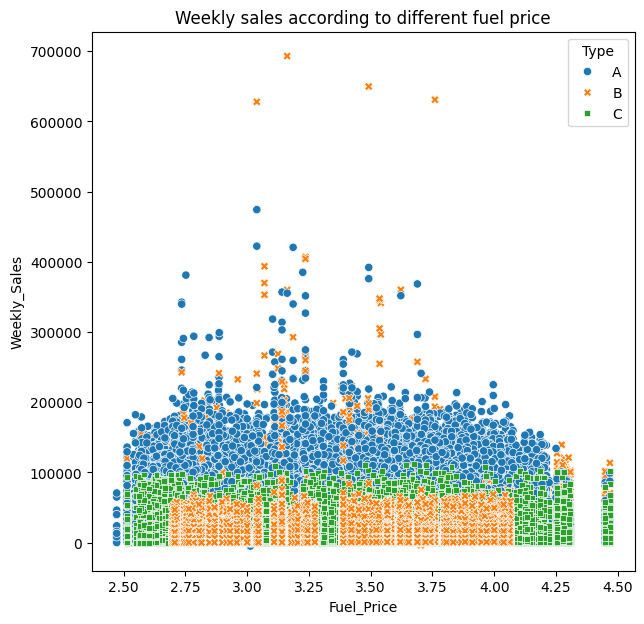

In [1172]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

sns.scatterplot(data = train_df, x = 'Fuel_Price', y = 'Weekly_Sales',
                hue = 'Type', palette = 'tab10', style = 'Type',
                ax = ax)

ax.set_title('Weekly sales according to different fuel price')
plt.show()

###############  
Observations  
###############

Overall, lower fuel prices tend to make people more willing to shop, as many households need to purchase a large amount of goods and use cars to transport them back home. Weekly sales revenue also increases when fuel prices are between 2.75 and 3.75.

##### 2.4.8 features 'MarkDown' 1 - 5

In [1173]:
markdown_df = train_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']]

markdown_df = markdown_df.dropna(subset = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],
                   how = 'all')

markdown_df.head(2)

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
92,10382.90,6115.67,215.07,2406.62,6551.42,18689.54
93,6074.12,254.39,51.98,427.39,5988.57,19050.66


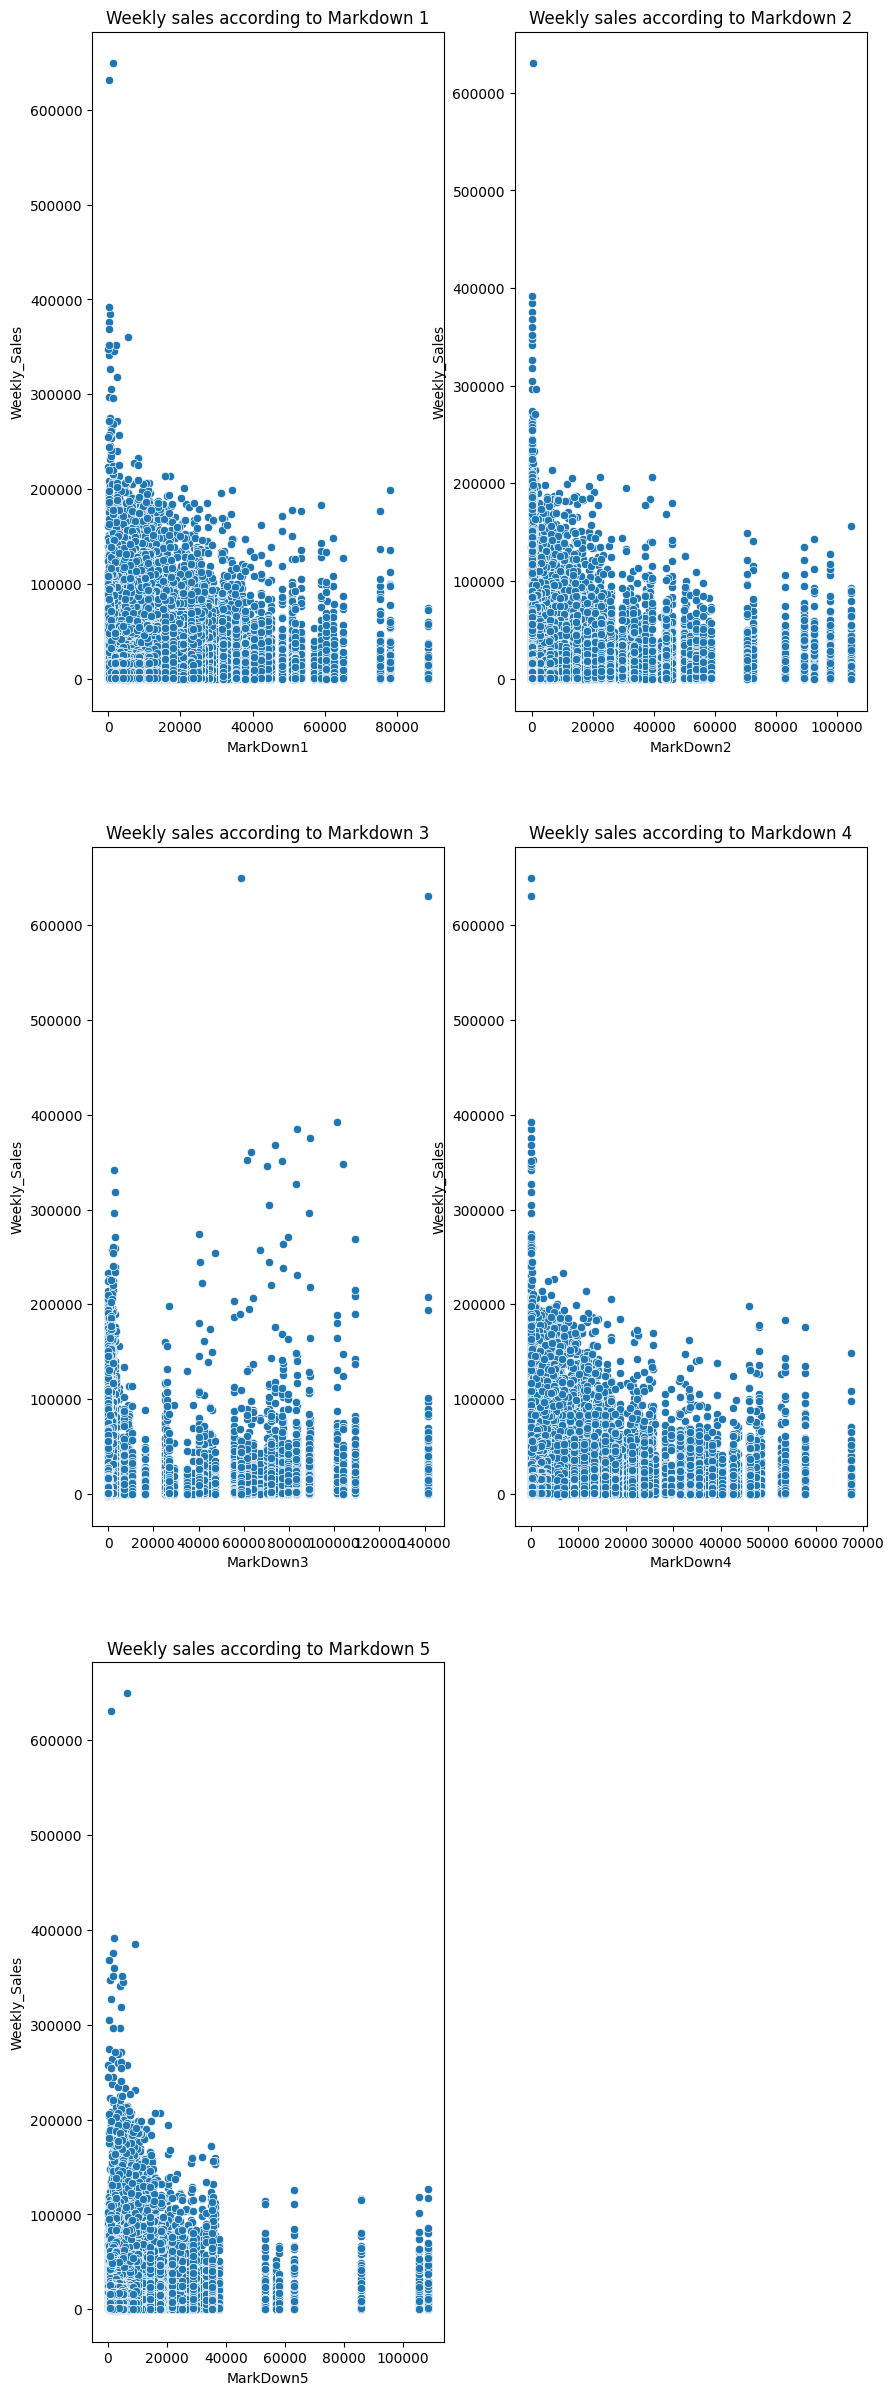

In [1174]:
fig = plt.figure(figsize = (10, 30))

ax_m1 = fig.add_subplot(321)
ax_m2 = fig.add_subplot(322)
ax_m3 = fig.add_subplot(323)
ax_m4 = fig.add_subplot(324)
ax_m5 = fig.add_subplot(325)

sns.scatterplot(data = markdown_df, x = 'MarkDown1', y = 'Weekly_Sales', ax = ax_m1)
sns.scatterplot(data = markdown_df, x = 'MarkDown2', y = 'Weekly_Sales', ax = ax_m2)
sns.scatterplot(data = markdown_df, x = 'MarkDown3', y = 'Weekly_Sales', ax = ax_m3)
sns.scatterplot(data = markdown_df, x = 'MarkDown4', y = 'Weekly_Sales', ax = ax_m4)
sns.scatterplot(data = markdown_df, x = 'MarkDown5', y = 'Weekly_Sales', ax = ax_m5)

ax_m1.set_title('Weekly sales according to Markdown 1')
ax_m2.set_title('Weekly sales according to Markdown 2')
ax_m3.set_title('Weekly sales according to Markdown 3')
ax_m4.set_title('Weekly sales according to Markdown 4')
ax_m5.set_title('Weekly sales according to Markdown 5')


plt.show()

###############  
Observations  
###############

Due to the fact that only rows with null values in markdown1-5 were deleted, there are still many retained rows where certain columns have values of null. Therefore, based on the current observations, we can not draw a clear relationship between markdowns and weekly sales at this time. Further investigation regarding these features will be leaved to the feature importance section.

##### 2.4.9 feature 'CPI'

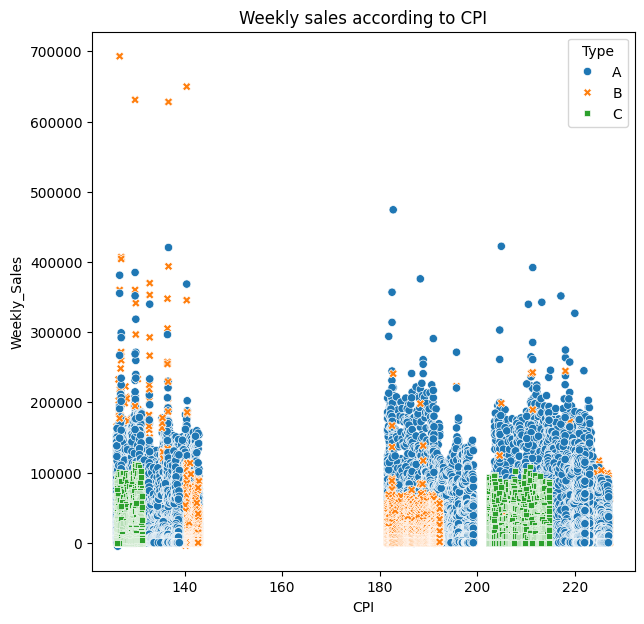

In [1175]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

sns.scatterplot(data = train_df, x = 'CPI', y = 'Weekly_Sales',
                hue = 'Type', palette = 'tab10', style = 'Type',
                ax = ax)

ax.set_title('Weekly sales according to CPI')
plt.show()

###############  
Observations  
###############

According to https://www.investopedia.com/terms/c/consumerpriceindex.asp:

"The Consumer Price Index (CPI) measures the monthly change in prices paid by U.S. consumers. The Bureau of Labor Statistics (BLS) calculates the CPI as a weighted average of prices for a basket of goods and services representative of aggregate U.S. consumer spending."

Same as 'Markdown', based on the current observations, we can not draw a clear relationship between markdowns and weekly sales at this time. Further investigation regarding these features will be leaved to the feature importance section.

##### 2.4.10 feature 'Unemployment'

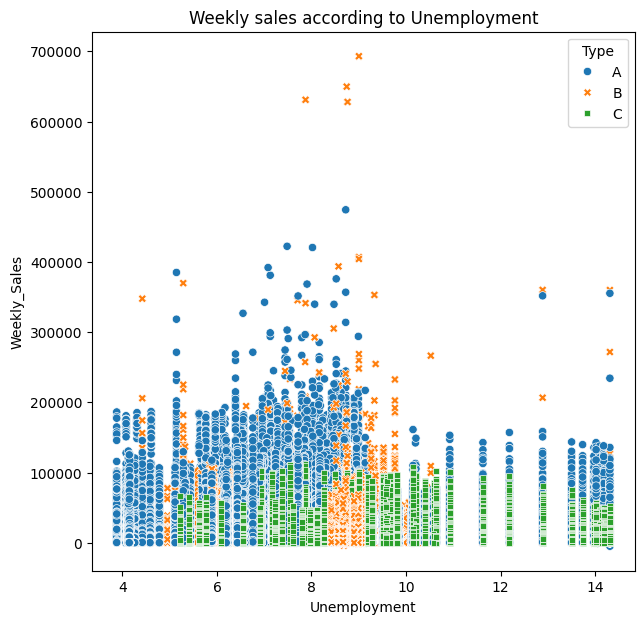

In [1176]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

sns.scatterplot(data = train_df, x = 'Unemployment', y = 'Weekly_Sales',
                hue = 'Type', palette = 'tab10', style = 'Type',
                ax = ax)

ax.set_title('Weekly sales according to Unemployment')
plt.show()

###############  
Observations  
###############

Low unemployment seems to contribute to the weekly sales, but still, same as 'Markdown', based on the current observations, we can not draw a clear relationship between markdowns and weekly sales at this time. Further investigation regarding these features will be leaved to the feature importance section.

##### 2.4.11 feature 'month'

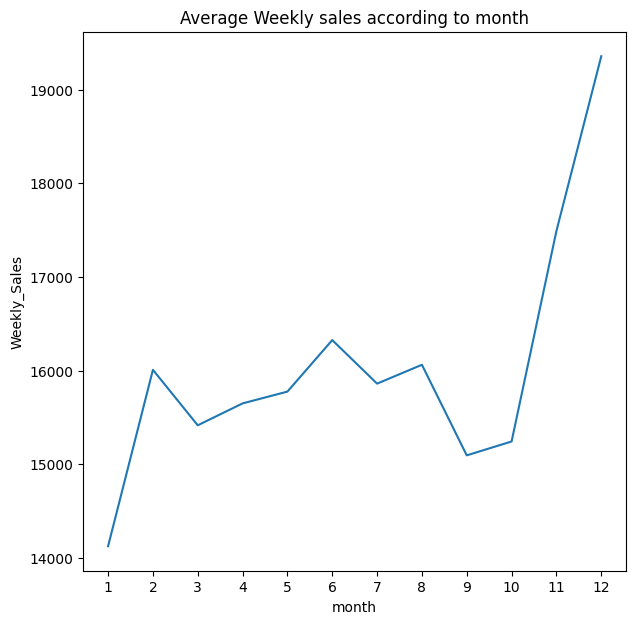

In [1177]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)

avg_sales = train_df.groupby('month')['Weekly_Sales'].mean()
months = avg_sales.index

sns.lineplot(x = months, y = avg_sales, ax = ax)

ax.set_title('Average Weekly sales according to month')
ax.set_xticks(months)

plt.show()

###############  
Observations  
###############

Holidays are in February, September, November, and December. Based on observations, the average weekly sales is lowest in January and highest towards the end of the year. The drop in sales in September and October may be due to people waiting for the discount events brought by Thanksgiving, Christmas (and possibly Black Friday).


##### 2.4.12 feature 'week'

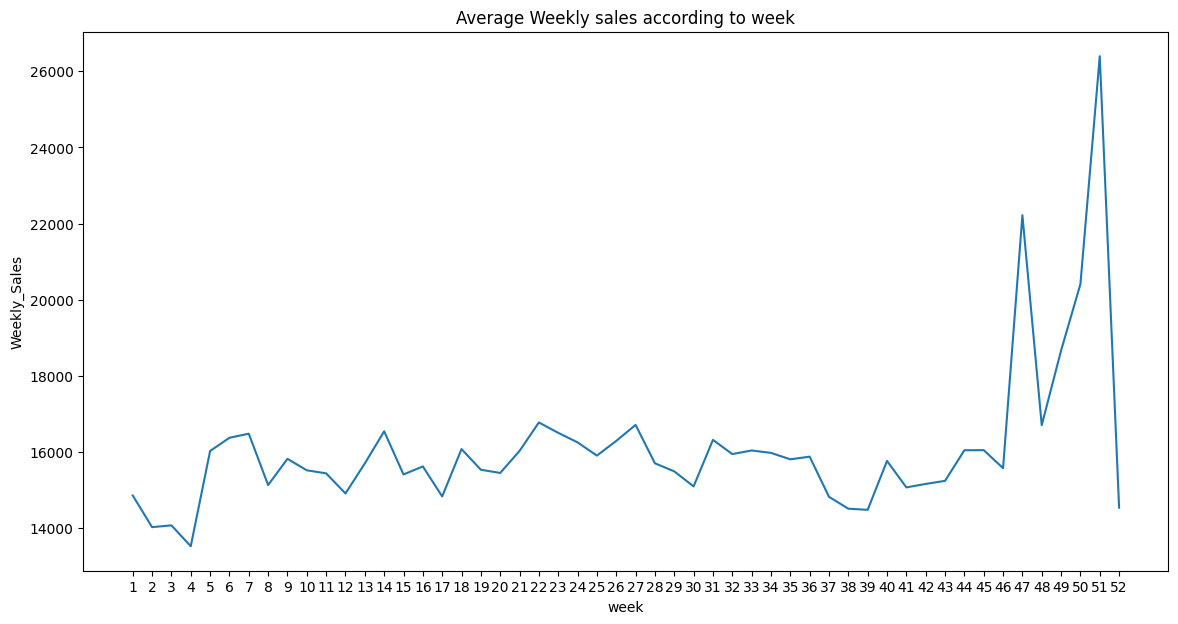

In [1178]:
fig = plt.figure(figsize = (14, 7))
ax = fig.add_subplot(111)

avg_sales = train_df.groupby('week')['Weekly_Sales'].mean()
weeks = avg_sales.index

sns.lineplot(x = weeks, y = avg_sales, ax = ax)

ax.set_title('Average Weekly sales according to week')
ax.set_xticks(weeks)

plt.show()

###############  
Observations  
###############

Breaking down time into weekly sales allows us to observe in greater detail how sales fluctuate from week to week. Overall, the trend of sales changing weekly roughly follows the trend of sales changing monthly. It can be observed that around weeks 6, 35, 47, and 51, which correspond to holidays, there is a significant increase in weekly sales.

---

### 3. Feature Selection

##### 3.0.1 Create dummy variables

In [1179]:
train_df = pd.read_csv('processed_data/full_train.csv').drop(['Unnamed: 0'], axis = 1)
test_df = pd.read_csv('processed_data/full_test.csv').drop(['Unnamed: 0'], axis = 1)

train_df = pd.get_dummies(train_df, columns=['Type'], prefix='Type')
test_df = pd.get_dummies(test_df, columns=['Type'], prefix='Type')

train_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,True,False,False
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,6,True,False,False


##### 3.0.2 Generate new features 'has_top_departments'

In [1180]:
# 92, 95, 38, 72, 65, 90, 40, 2: top 8 departments

def check_top_departments(row):

    if row['Dept'] in [92, 95, 38, 72, 65, 90, 40, 2]:
        row['has_top_departments'] = True
    else:
        row['has_top_departments'] = False

    return row

train_df = train_df.apply(check_top_departments, axis = 1)
test_df = test_df.apply(check_top_departments, axis = 1)

train_df['has_top_departments'].value_counts(dropna = False)


has_top_departments
False    376771
True      44799
Name: count, dtype: int64

In [1181]:
test_df['has_top_departments'].value_counts(dropna = False)

has_top_departments
False    102857
True      12207
Name: count, dtype: int64

In [1182]:
train_df.shape, test_df.shape

((421570, 21), (115064, 20))

##### 3.0.3 Generate X_train & X_test

In [1183]:
X_train = train_df.drop(['Weekly_Sales', 'Date', 'Dept'], axis = 1)
X_test = test_df.drop(['Date', 'Dept'], axis = 1)

X_train.shape, X_test.shape

((421570, 18), (115064, 18))

In [1184]:
X_train.head(2)

,Store,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,Type_A,Type_B,Type_C,has_top_departments
0,1,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,True,False,False,False
1,1,True,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,6,True,False,False,False


In [1185]:
X_test.head(2)

,Store,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,Type_A,Type_B,Type_C,has_top_departments
0,1,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,11,44,True,False,False,False
1,1,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,11,45,True,False,False,False


##### 3.0.4 Fill missing values for markdown 1 - 5

<Axes: ylabel='Density'>

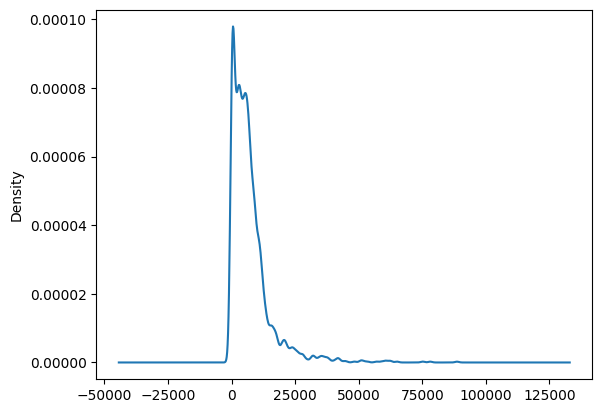

In [1186]:
train_df['MarkDown1'].plot.density()

<Axes: ylabel='Density'>

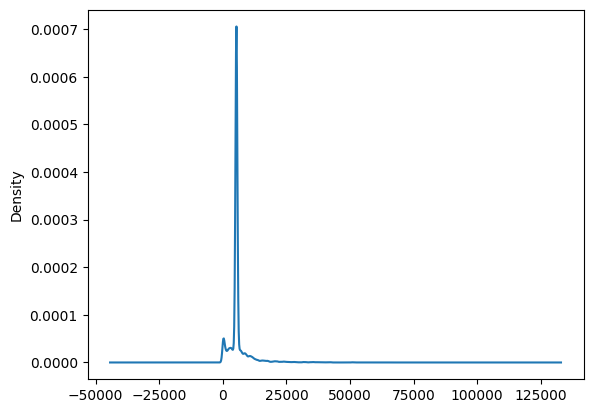

In [1187]:
# Filling in Missing Values with median due to the uneven distribution of values for this feature

train_df['MarkDown1'] = train_df['MarkDown1'].fillna(train_df['MarkDown1'].median())

train_df['MarkDown1'].plot.density()

<Axes: ylabel='Density'>

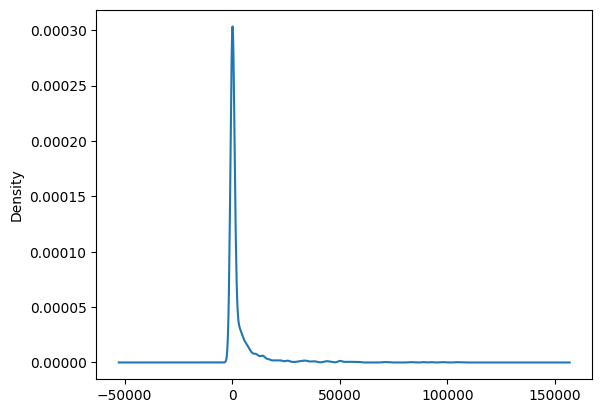

In [1188]:
train_df['MarkDown2'].plot.density()

<Axes: ylabel='Density'>

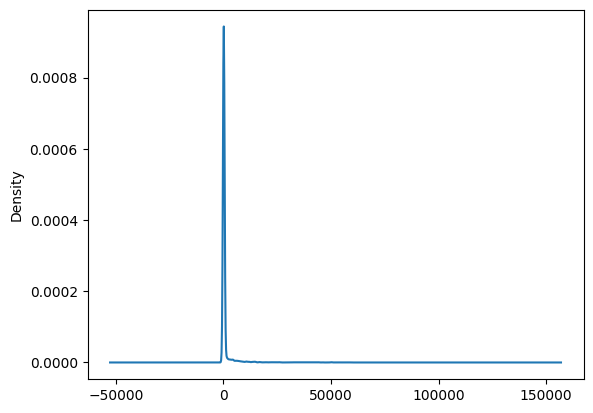

In [1189]:
# Filling in Missing Values with median due to the uneven distribution of values for this feature

train_df['MarkDown2'] = train_df['MarkDown2'].fillna(train_df['MarkDown2'].median())

train_df['MarkDown2'].plot.density()

<Axes: ylabel='Density'>

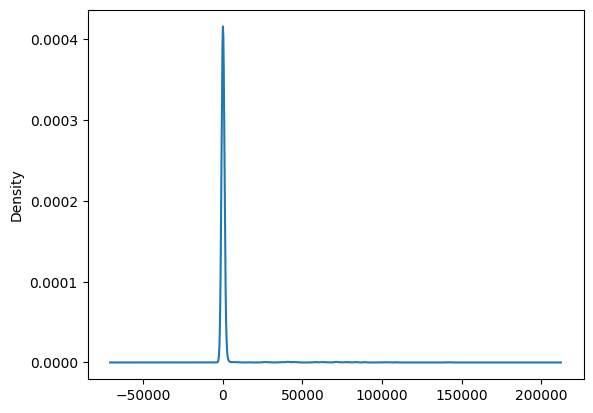

In [1190]:
train_df['MarkDown3'].plot.density()

<Axes: ylabel='Density'>

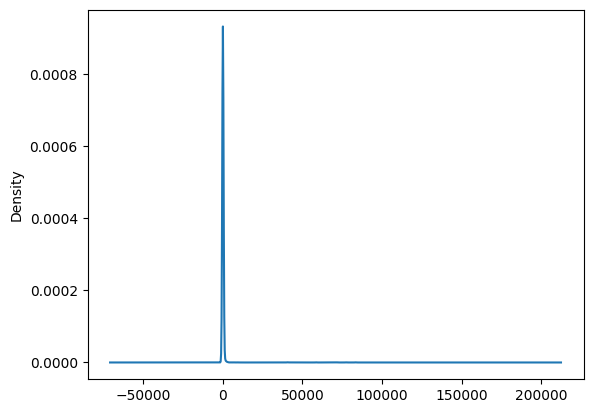

In [1191]:
# Filling in Missing Values with median due to the uneven distribution of values for this feature

train_df['MarkDown3'] = train_df['MarkDown3'].fillna(train_df['MarkDown3'].median())

train_df['MarkDown3'].plot.density()

<Axes: ylabel='Density'>

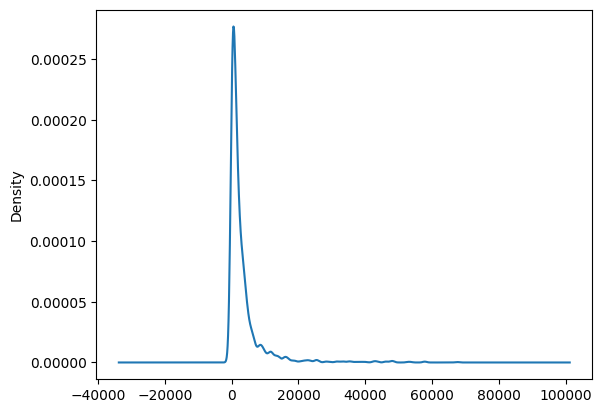

In [1192]:
train_df['MarkDown4'].plot.density()

<Axes: ylabel='Density'>

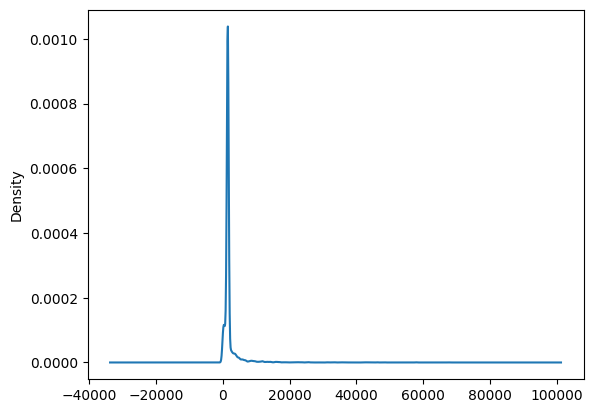

In [1193]:
# Filling in Missing Values with median due to the uneven distribution of values for this feature

train_df['MarkDown4'] = train_df['MarkDown4'].fillna(train_df['MarkDown4'].median())

train_df['MarkDown4'].plot.density()

<Axes: ylabel='Density'>

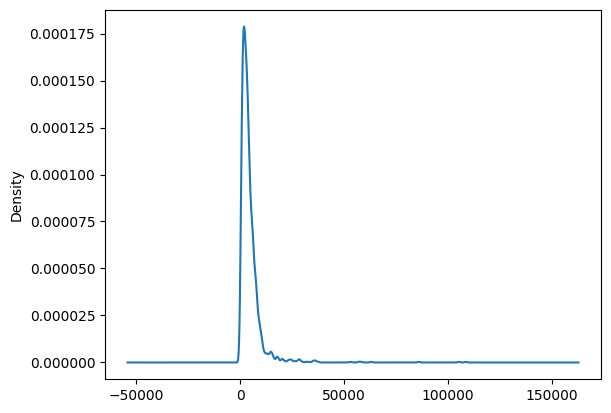

In [1194]:
train_df['MarkDown5'].plot.density()

<Axes: ylabel='Density'>

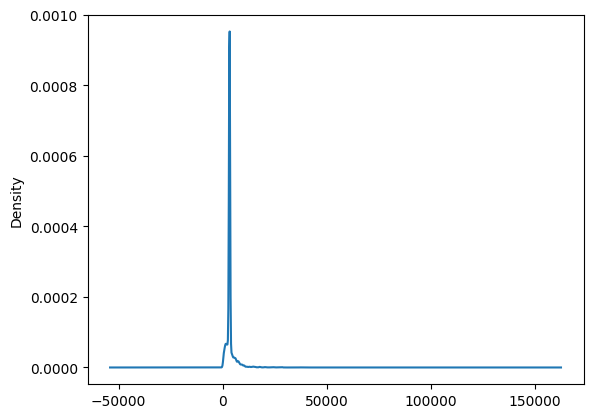

In [1195]:
# Filling in Missing Values with median due to the uneven distribution of values for this feature

train_df['MarkDown5'] = train_df['MarkDown5'].fillna(train_df['MarkDown5'].median())

train_df['MarkDown5'].plot.density()

The decrease in the correlations between 'weekly_sales' & 'markdown 1 - 5' is acceptable.

#### 3.1 Filter method

##### 3.1.1 ANOVA(f_regression)

In [1196]:
from sklearn.feature_selection import SelectKBest, f_regression

X = train_df.drop(['Date', 'Weekly_Sales'], axis = 1)
y = train_df['Weekly_Sales']

k_best = SelectKBest(f_regression, k = 5)

X_new = k_best.fit_transform(X, y)

X_new.shape

(421570, 5)

In [1197]:
selected_features_indices = k_best.get_support(indices = True)

print("5 best:", X.columns[selected_features_indices].values)

5 best: ['Dept' 'Size' 'Type_A' 'Type_B' 'has_top_departments']


##### 3.1.2 Correlation Matrix

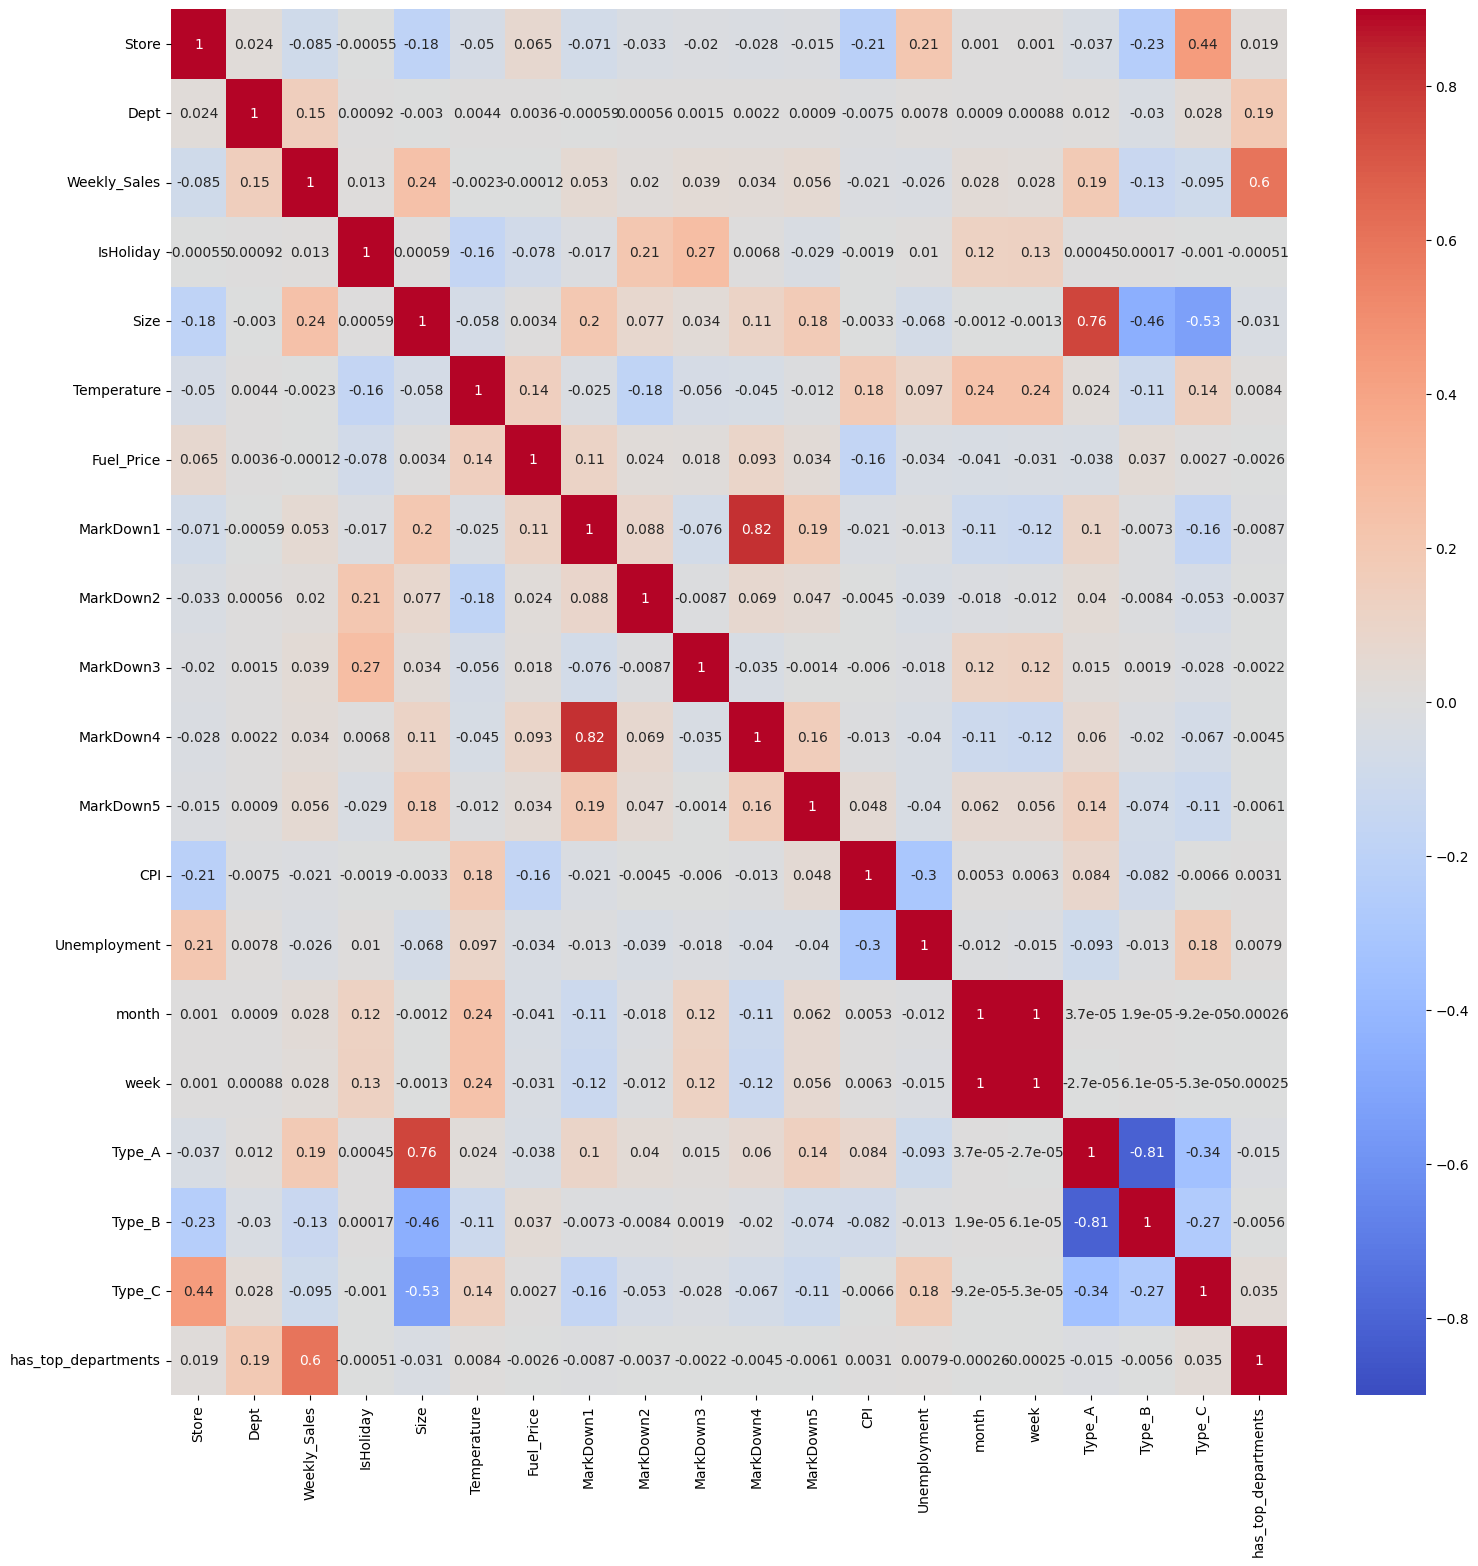

In [1198]:
corr_df = train_df.drop(['Date'], axis = 1)

fig = plt.figure(figsize = (18, 18))
ax = fig.add_subplot(111)

corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmin = -0.9, vmax = 0.9, ax = ax)

plt.show()

In [1199]:
# upper triangle correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))

# show any feature that has correlation with some features that is bigger than 0.7
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.7)]

print(to_drop)

['MarkDown4', 'week', 'Type_A', 'Type_B']


#### 3.2 Embedded Methods

##### 3.2.1 Feature Importance by LASSO

In [1200]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso

scaler = StandardScaler()

X = train_df.drop(['Date', 'Weekly_Sales'], axis = 1)
y = train_df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

# ==================================================================

lasso_model = Lasso(alpha = 25, max_iter = 1000)

lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

print('Lasso:')
print('train: R^2: {}'.format(lasso_model.score(X_train_scaled, y_train)))
print('test: R^2: {}'.format(lasso_model.score(X_test_scaled, y_test)))
print('\nMAE: {}'.format(mean_absolute_error(y_pred, y_test)))

Lasso:
train: R^2: 0.4437111665885862
test: R^2: 0.44539305454024747

MAE: 11091.27164059131


In [1201]:
l_coef = lasso_model.coef_
f_names = X.columns

len(f_names)

19

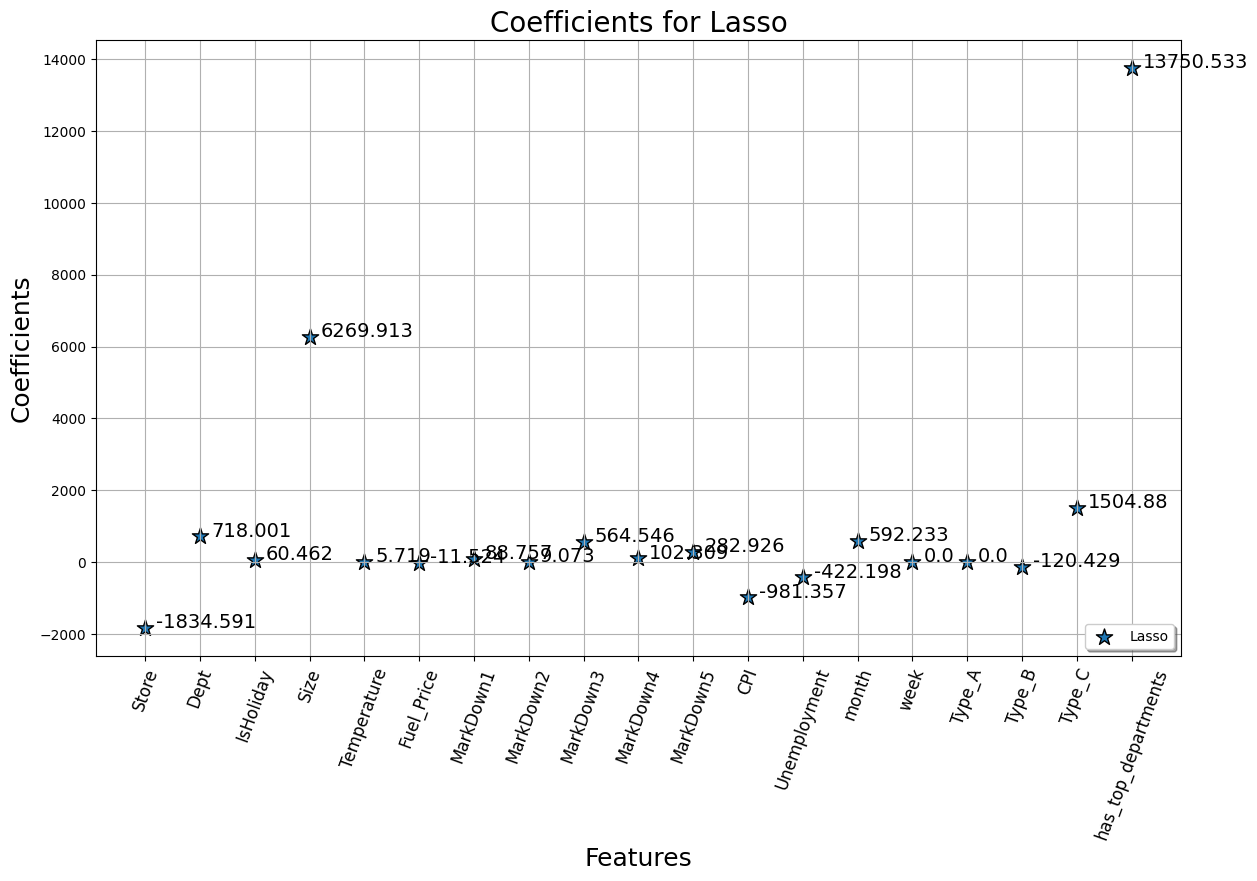

In [1202]:
# visualization of feature importance

xx = np.arange(1, 20)

fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot(111)
ax.grid(True)

ax.scatter(xx, l_coef, label = 'Lasso', marker = '*', edgecolors = 'black', s = 150)

ax.set_xlabel('Features', fontsize = 18)
ax.set_ylabel('Coefficients', fontsize = 18)

ax.set_xticks(np.linspace(1, 19, 19))
ax.set_xticklabels(f_names, fontsize = 12, rotation = 70)

for i, txt in enumerate(l_coef):
    plt.text(x = xx[i] + 0.2, y = l_coef[i], s = round(txt, 3), fontsize = 14)

ax.legend(loc = 'lower right', shadow = True)
ax.set_title('Coefficients for Lasso', fontsize = 20)

plt.show()

##### 3.2.3 Feature Importance by RandomForest

<Axes: >

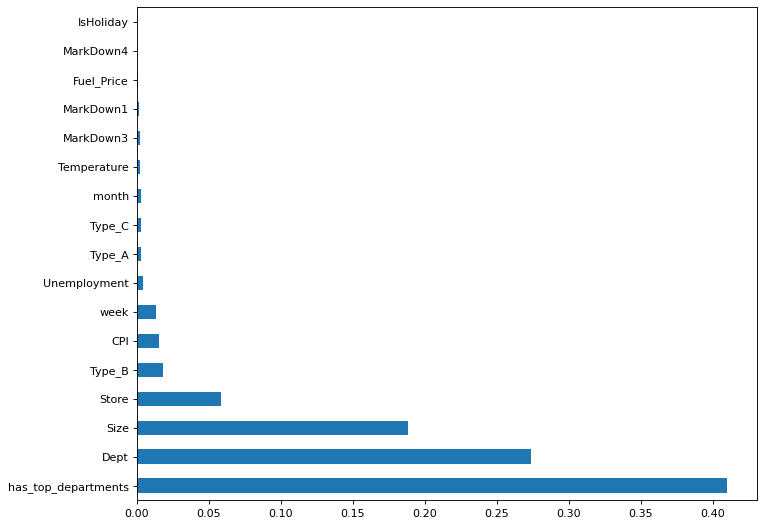

In [1203]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 150, 
                                 max_depth = 10,
                                 random_state = 0)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# visualize feature importance

plt.figure(num = None, figsize = (10,8), dpi = 80, facecolor = 'w', edgecolor = 'k')

feat_importances = pd.Series(rf_model.feature_importances_, index = X.columns)

feat_importances.nlargest(17).plot(kind = 'barh')

---

### 4. Model Selection

In [1204]:
# increase training speed, reduce model complexity
top8_features = ['has_top_departments',
                 'Dept',
                 'Size',
                 'Store',
                 'Type_A',
                 'week',
                 'Unemployment',
                 'IsHoliday']

In [1205]:
X_train = train_df[top8_features]
y_train = train_df[['Weekly_Sales']]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = top8_features)

X_train_scaled.shape, y_train.shape

((421570, 8), (421570, 1))

In [1206]:
# import models
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

# building pipeline
from sklearn.pipeline import Pipeline

pipeline_ridge = Pipeline([('Ridge', Ridge())])
pipeline_lasso = Pipeline([('Lasso', Lasso())])
pipeline_knn = Pipeline([('KNeighborsRegressor', KNeighborsRegressor())])
pipeline_rf = Pipeline([('RandomForestRegressor', RandomForestRegressor(max_depth = 10))])
pipeline_lgbm = Pipeline([('LGBMRegressor', LGBMRegressor(objective = 'mean_absolute_error', 
                                                          random_state = 0, 
                                                          num_leaves = 40, 
                                                          max_depth = 10, 
                                                          verbose = 0))])
pipeline_catB = Pipeline([('CatBoostRegressor', CatBoostRegressor(verbose = 0, loss_function = 'MAE'))])
pipeline_gb = Pipeline([('GradientBoostingRegressor', GradientBoostingRegressor(max_depth = 10, loss = 'absolute_error'))])

pipelines = [pipeline_ridge, 
             pipeline_lasso,
             pipeline_knn, 
             pipeline_rf, 
             pipeline_lgbm,
             pipeline_catB,
             pipeline_gb]

pipe_dict = {0: 'Ridge', 
             1: 'Lasso', 
             2: 'KNeighborsRegressor',
             3: 'RandomForestRegressor', 
             4: 'LGBMRegressor', 
             5: 'CatBoostRegressor', 
             6: 'GradientBoostingRegressor'}

results_dict = {}
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train.values,y_train.values.ravel(), cv = 3 ,scoring = 'r2').mean()
    results_dict[pipe_dict[i]] = cv_score

for key, value in sorted(results_dict.items(),key = lambda item : item[1]):
    print(key, value) 

Ridge 0.3943099194097715
Lasso 0.39439374486702716
KNeighborsRegressor 0.4848133334678309
RandomForestRegressor 0.6337560877717909
LGBMRegressor 0.6782013887586555
GradientBoostingRegressor 0.684792096081163
CatBoostRegressor 0.7018134817802606


In [1207]:
from sklearn.model_selection import GridSearchCV

cat = CatBoostRegressor(loss_function = 'MAE',
                        verbose = 0)

# grid search
params_catB = {
    'learning_rate': [0.01, 0.03,],
          'depth': [6, 7,],
    'iterations': [450, 1000,]
}

grid_search_cat = GridSearchCV(estimator = cat,verbose = 1, 
                               param_grid = params_catB, 
                               cv = 3, scoring = 'r2',
                               n_jobs = -1).fit(X_train.values, 
                                                y_train.values.ravel())
cat_best = grid_search_cat.best_estimator_

print('CatBoost Best r2 Score', grid_search_cat.best_score_)
print('CatBoost Best Parmas', grid_search_cat.best_params_)
print('CatBoost r2', cross_val_score(cat_best, X_train.values, y_train.values.ravel(), cv = 3).mean())

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CatBoost Best r2 Score 0.7033084858197527
CatBoost Best Parmas {'depth': 7, 'iterations': 1000, 'learning_rate': 0.03}
CatBoost r2 0.7033084858197527


---

### 5. Submit

In [1211]:
test_df.head(2)

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week,Type_A,Type_B,Type_C,has_top_departments
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,11,44,True,False,False,False
1,1,1,2012-11-09,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,11,45,True,False,False,False


In [1212]:
X_test = test_df[top8_features]

X_test.head(2)

,has_top_departments,Dept,Size,Store,Type_A,week,Unemployment,IsHoliday
0,False,1,151315,1,True,44,6.573,False
1,False,1,151315,1,True,45,6.573,False


In [1214]:
predictions = cat_best.predict(X_test.values)

test_df['Store'] = test_df['Store'].astype(str)
test_df['Dept'] = test_df['Dept'].astype(str)

sub = pd.DataFrame()
sub['Id'] = test_df.apply(lambda row: '_'.join(row[:3]), axis = 1)
sub['Weekly_Sales'] = predictions
sub.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,20087.542493
1,1_1_2012-11-09,19947.706346
2,1_1_2012-11-16,19947.706346
3,1_1_2012-11-23,21740.119662
4,1_1_2012-11-30,21516.557006


In [1215]:
sub.to_csv('submission.csv', index = False)